In [145]:
#imports
import scipy as sp
import math
import numpy as np

import pprint  as pp
import matplotlib.pyplot as plt
from functools import partial
from ipywidgets import interact


In [146]:
#cts
m_scale = 1
cg_na   = 74   * m_scale * 10**-3 # para q g_i*V-E : [mA]
cg_l    = 19   * m_scale * 10**-3 # "
cE_na   = 60   * m_scale
cE_l    = -67  * m_scale
cC_m    = 0.01 * m_scale * 10**-3 # para q dVdt : [mV/s]
cV_h    = 1.5  * m_scale
ck      = 16   * m_scale

# mS * mV  /mF 
# mF > mC/V | 
#  
# mS*mV+mA/mF -> mA /mF  -> V*mA / mC -> mV / s

In [186]:
def pv(v):
    return 1/( 1 + math.exp( (cV_h-v)/ck) )

def dV(v,I):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) - I) / cC_m 
# 

def dV_ivp(v,t):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) ) / cC_m 

def dV_ivp2(t,v):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) ) / cC_m 

def dV_ivp3(t,v,I):
    return - (cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l) - I(t) ) / cC_m 

dV0 = partial (dV,I=0)

# ???? why?? 
def dV_0(v):
    return -(1/ cC_m ) *(cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l))

def dV_Ix(v):
    return -(1/ cC_m ) *(cg_na*pv(v)*(v-cE_na) + cg_l*(v-cE_l)-0.022)


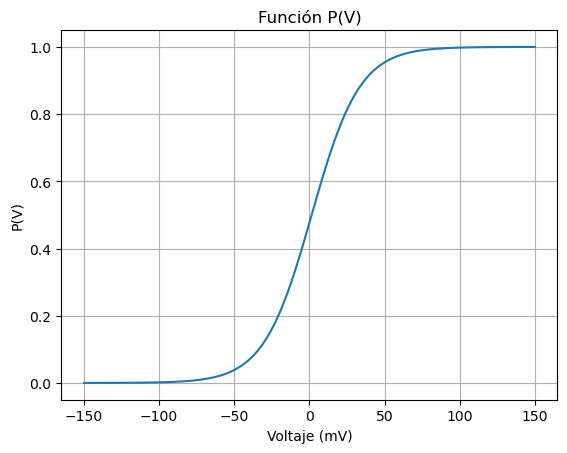

In [129]:
#plot Pv
m_DomPv = 150
m_samplePv = 200
plDomPv = np.linspace(-m_DomPv , m_DomPv , m_samplePv)
plt.plot(plDomPv,list(map(pv,plDomPv)))
plt.xlabel("Voltaje (mV)")
plt.title("Función P(V)")
plt.ylabel("P(V)")
plt.grid("on")

In [137]:
#finding roots of dV/dt with I = 0
#dunno why you redid this anyway. ..
seedNum =20
seeds = np.linspace(-100,100,seedNum)

r_dV0 = partial (sp.optimize.fsolve, dV0)

print ("seed\t->\troot",*zip( seeds, map( lambda x : r_dV0(x)[0] , seeds ) ), sep='\n' ) #make it pretty. ..

seed	->	root
(-100.0, -52.5123214621681)
(-89.47368421052632, -52.5123214621681)
(-78.94736842105263, -52.51232146216836)
(-68.42105263157895, -52.512321462168096)
(-57.89473684210526, -52.51232146217548)
(-47.368421052631575, -52.51232146216808)
(-36.84210526315789, -40.28545968005427)
(-26.315789473684205, -40.285459680055176)
(-15.78947368421052, -40.28545968005576)
(-5.263157894736835, -40.28545968005536)
(5.26315789473685, 30.86315196954262)
(15.789473684210535, 30.86315196954263)
(26.31578947368422, 30.863151969542542)
(36.84210526315792, 30.86315196954268)
(47.36842105263159, 30.863151969542624)
(57.89473684210526, 30.863151969542646)
(68.42105263157896, 30.86315196954277)
(78.94736842105266, 30.863151969542983)
(89.47368421052633, 30.863151969543143)
(100.0, 30.863151969543203)


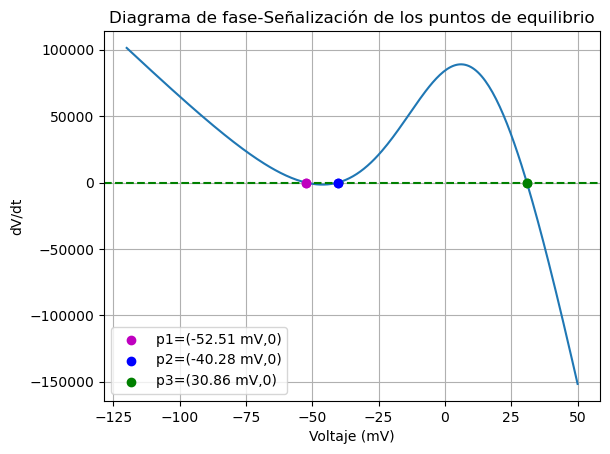

In [143]:
#plot dV I=0 #algo con la escala no cuadra parece q bota el resultado en micro?voltios
m_DomdVI0M = 50
m_DomdVI0m = -120
m_samplesdVI0 = 250
plDomdVI0 = np.linspace(m_DomdVI0m , m_DomdVI0M , m_samplesdVI0)

plt.plot(plDomdVI0,list(map(dV0,plDomdVI0)))

plt.axhline(0,color = 'g', linestyle = '--')

p1 = plt.scatter(-52.51,0, marker='o', color='m')
p2 = plt.scatter(-40.28,0, marker='o', color='b')
p3  = plt.scatter(30.86,0, marker='o', color='g')

plt.legend((p1, p2, p3),
           ('p1=(-52.51 mV,0)', 'p2=(-40.28 mV,0)', 'p3=(30.86 mV,0)'))
plt.plot(-52.51,0,'om' )
plt.plot(-40.28,0,'ob' )
plt.plot(30.86,0,'og' )
plt.xlabel("Voltaje (mV)")
plt.ylabel("dV/dt")
plt.title("Diagrama de fase-Señalización de los puntos de equilibrio")
plt.grid("on")

In [183]:
#???????????? attempted to reinterpret this
#def dV_Ix(v): ??????????

#finding roots of dV/dt with I = a

print("seed \t\t-> \t root")
tmpt = "{:>.3f}  \t->\t{:.3f}"

#seeds = np.linspace(-100,40,10)
#r_dV0 = partial (sp.optimize.fsolve, dV_Ix)
#zp = zip( seeds, map( lambda x : r_dV0(x)[0] , seeds ) )
#print ( *map(lambda x :  tmpt.format(x[0], x[1]) ,zp) , sep = '\n' )

vstart =-100
vstop = 100
x = []
x = np.zeros(vstop+3)
# Define the Equation
dV_Ix2 = partial(sp.optimize.fsolve, partial(dV,I=.022))
k = np.linspace(vstart,vstop,25)
for idx,val in zip(k, map(dV_Ix2,k) ):
  print (tmpt.format( idx , *val), sep='\n') 
  #print ( idx , val, sep='\n') 
    

seed 		-> 	 root
-100.000  	->	-46.216
-91.667  	->	-46.202
-83.333  	->	-46.197
-75.000  	->	-46.196
-66.667  	->	-46.197
-58.333  	->	-46.195
-50.000  	->	-46.196
-41.667  	->	-46.196
-33.333  	->	-46.198
-25.000  	->	-46.200
-16.667  	->	-46.198
-8.333  	->	-46.198
0.000  	->	-46.175
8.333  	->	31.191
16.667  	->	31.191
25.000  	->	31.191
33.333  	->	31.191
41.667  	->	31.191
50.000  	->	31.191
58.333  	->	31.191
66.667  	->	31.191
75.000  	->	31.191
83.333  	->	31.191
91.667  	->	31.191
100.000  	->	31.191


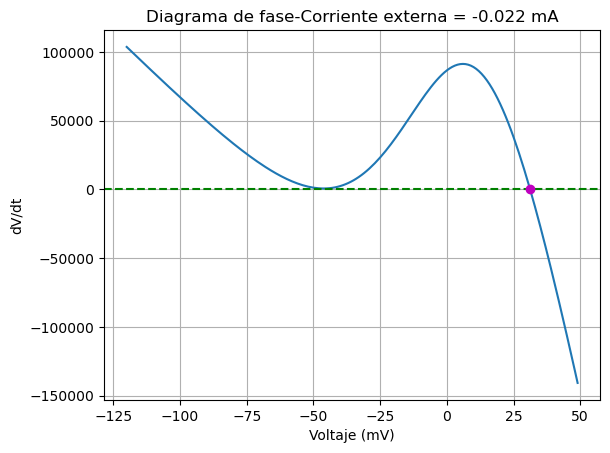

In [190]:
m_DomdVI22M = 50
m_DomdVI22m = -120
m_stepdVI22 = 1

plDomdVI22 = np.arange(m_DomdVI22m , m_DomdVI22M,m_stepdVI22 )

plt.plot(plDomdVI22,list(map(dV_Ix,plDomdVI22)))
plt.axhline(0,color = 'g', linestyle = '--')
plt.plot(31.19,0,'om')
plt.xlabel("Voltaje (mV)")
plt.ylabel("dV/dt")
plt.title("Diagrama de fase-Corriente externa = -0.022 mA")#-22 -> 0.022 (*10^-3)
plt.grid("on")

In [192]:
# ajuste parametros para ver en qué momento deja de cortar con x=0
m_p3_xm     = -50
m_p3_xM     = -40
m_p3_step   = 0.5
m_p3_x = np.arange(m_p3_xm,m_p3_xM,m_p3_step)

def plotF1(Ix):
    Ixx = Ix*2**-8
    print(Ixx)
    plt.axhline(y=0) 
    plt.plot( m_p3_x , list(
            map( partial(dV,I=Ixx) , m_p3_x ) ) )
interact ( 
    plotF1,
    Ix = (0.00,16.00 ) )



interactive(children=(FloatSlider(value=8.0, description='Ix', max=16.0), Output()), _dom_classes=('widget-int…

<function __main__.plotF1(Ix)>

In [193]:
#solve IVP using solve_ivp bc can do 
def plotF2(v_in):
    xm = 0
    xM = .03
    lsp = np.linspace(xm,xM,300)
    l_in = np.linspace(-100,0,200)
    t = (xm,xM)
    #sp.integrate.odeint(dV0, v_in,v_t)
    sol = sp.integrate.solve_ivp(dV_ivp2 , t , [v_in] , dense_output=True, method='LSODA')
    #print(sol)#, sol.t , sep='\n__\n')
    plt.plot(sol.t,sol.y[0])
    #plt.plot(sol.t, sol.sol(t))


interact(   plotF2
            , v_in=(-120.0,20.0))

interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), Output()), _dom_clas…

<function __main__.plotF2(v_in)>

In [194]:
#same but odeint
def plotF3(v_in):
    xm = 0
    xM = .5

    lsp = np.linspace(xm,xM,150)
    l_in = np.linspace(0,150,200)
    t = [xm,xM]
    sol = sp.integrate.odeint(dV_ivp, v_in, lsp )
    #sol = sp.integrate.solve_ivp(dV_ivp , t , [v_in]) 
    print(*sol)
    plt.plot(lsp,sol)
        #plotF2

interact(   plotF3
            , v_in=(-120.0,20.0))

interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), Output()), _dom_clas…

<function __main__.plotF3(v_in)>

In [233]:
#bono  I_in(t)  test functs defined here::
#test values on next cell
a = 69
b = 69

#piecewise def: (a,b) ->  t > f(t) = a 
pwinp = [ 
    (0.5,0.2),
    (1,0),
    (5.0,-0.5),
    (6,0)
    ]
#piecewise funct. def --------------------
#inp tuples as in (t_vale, f_value)

def pwStepf(t,pcs):
    s = len(pcs)-1
    if(t < (pcs[0][0])):  
        return 0
    elif (t>pcs[s][0]):
        return pcs[s][1]
    else:
        idx = s >> 1#2   
        while idx < s:
            if(t > pcs[idx][0]):
                if(t < pcs[idx+1][0]):
                    return pcs[idx][1]
                else:
                    idx+=1
            else:
                idx-=1
#----------------------------------------

def funcGen_I( a , b ):
    #return lambda t : (vM*np.sin(t*f)**4)
    return (lambda t : (   (np.exp(a*np.sin(b*t)**2)) **-1  ) )
    #return lambda x : (   (np.exp(a*np.sin(b*x)**2)) **-1  )
#----------------------------------------


In [256]:


def plotF4(v_in, a, b):
    xm = 0
    xM = 1
    
    #f_I1 = funcGen_I(a,b)
    f_I1 = partial( pwStepf , pcs=[(a/100,0.2),(b/100,-1.5),(.5,0) ] )
    par = tuple([f_I1])

        #DELETE??
    lsp = np.linspace(xm,xM,100)
        #l_in = np.linspace(-100,0,200)
        #t = (xm,xM)
    #sol = sp.integrate.odeint(dV_ivp3 , [v_in] , lsp , par,  tfirst=True)
    sol = sp.integrate.solve_ivp(dV_ivp3 , (xm,xM) ,  [v_in], args=par , method='LSODA'  )
    plt.plot(sol.t,sol.y[0])
    #plt.plot(lsp,sol[:,0] )
    

interact(   plotF4, 
            v_in=(-120.0,20.0),
            a=(0,30.0),
            b=(15,50.0)
            )

#

interactive(children=(FloatSlider(value=-50.0, description='v_in', max=20.0, min=-120.0), FloatSlider(value=15…

<function __main__.plotF4(v_in, a, b)>

In [197]:
#func test area
#inp tuples as in (t_vale, f_value)
pwinp = [
    (0.5,0.2),
    (1,0),
    (5.0,-0.5),
    (6,0)
    ]

def pwStepf(t,pcs):
    s = len(pcs)-1
    if(t<pcs[0][0]):  
        return 0
    elif (t>pcs[s][0]):
        return pcs[s][1]
    else:
        idx = s >> 1#2   
        while idx < s:
            if(t > pcs[idx][0]):
                if(t < pcs[idx+1][0]):
                    return pcs[idx][1]
                else:
                    idx+=1
            else:
                idx-=1


@interact(
    a=(0,100.0),
    b=(0,100.0))
def plot(a,b): #a,b>0
    D = np.linspace(-1,10,200)
    plt.axhline(y=0)
    #plt.plot(D ,(lambda x :  (    (np.sin( 1 - np.exp(10*(x**2-2*x)) )) **1            ))(D))
    #plt.plot(D ,(lambda x : (   (np.exp(10*np.sin(10*x)**2)) **-1  ))(D))
    plt.plot(D ,(lambda x : (   (np.exp(a*np.sin(b*x)**2)) **-1  ))(D))
    plt.plot(D , list(map((lambda x  : pwStepf(x,pwinp)) , D )) )

    plt.show()
    


interactive(children=(FloatSlider(value=50.0, description='a'), FloatSlider(value=50.0, description='b'), Outp…